# Optimization

## Notebook Introduction

In this short notebook, we will see how to use the gradient obtained with Autograd to perform optimization of an objective function.  
Then we will also present some off-the-shelf Pytorch optimizers and learning rate schedulers.  
As an eye candy, we will finish with some live optimization vizualisations.

___

## Google Colab only!

In [ ]:
# execute only if you're using Google Colab
!wget -q https://raw.githubusercontent.com/ahug/amld-pytorch-workshop/master/binder/requirements.txt -O requirements.txt
!pip install -qr requirements.txt
!wget -q https://raw.githubusercontent.com/ahug/amld-pytorch-workshop/master/live_plot.py -O live_plot.py

___

In [1]:
import torch
import numpy as np

In [2]:
#%matplotlib notebook
torch.set_printoptions(precision=3)

## Optimizing "by hand"

We will start with a simple example : minimizing the square function.


In [3]:
def f(x):
    return x ** 2 + 20

We will minimize the function $f$ "by hand" using the gradient descent algorithm.

As a reminder, the update step of the algorithm is:
$$x_{t+1} = x_{t} - \lambda \nabla_x f (x_t)$$

Note:
- The gradient information $\nabla_x f (x)$ is stored in `x.grad`. Once we have run the `backward` function, we can use it to do our update step.
- We need to do `x.data = ...` in the update step since want to change x in place but don't want autograd to track this change 

In [4]:
# YOUR TURN

x0 = 7
lr = 0.1
iterations = 10

x = torch.Tensor([x0]).requires_grad_()
y = f(x)

for i in range(iterations):
    
    # < YOUR CODE HERE >
    x.grad = None
    y = f(x)
    y.backward()
    x.data = x - lr * x.grad
    
    print(y.data)

tensor([69.])
tensor([51.360])
tensor([40.070])
tensor([32.845])
tensor([28.221])
tensor([25.261])
tensor([23.367])
tensor([22.155])
tensor([21.379])
tensor([20.883])


#### Why do we have x.data?

If you do `x = ...`, then x is not a leaf variable anymore and will have a computation history. Since it is not a leaf anymore after the first iteration, its gradient will not be available at the second iteration.

Workarounds:
 - Define x as a new leaf variable requiring gradient at each iterations using `detach()` and `require_grad_()`
 - Update `x.data` so that it is not recorded by autograd

## Optimizing with an optimizer

### Different optimizers
Pytorch provides most common optimization algorithms encapsulated into "optimizer classes".  
An optimizer is a useful object that automatically loops through all the numerous parameters of your model and performs the (potentially complex) update step for you.

You first need to execute `import optim`. 

In [5]:
import torch.optim as optim

Below are the most commonly used optimizers. Each of them have its specific parameters that you can check on the [Pytorch Doc](https://pytorch.org/docs/master/optim.html#algorithms).

In [6]:
parameters = [x]  # This should be the list of model parameters

optimizer = optim.SGD(parameters, lr=0.01, momentum=0.9)
optimizer = optim.Adam(parameters, lr=0.01)
optimizer = optim.Adadelta(parameters, lr=0.01)
optimizer = optim.Adagrad(parameters, lr=0.01)
optimizer = optim.RMSprop(parameters, lr=0.01)
optimizer = optim.LBFGS(parameters, lr=0.01)

# and there is more ...

### Using an optimizer

Now, let's use an optimizer to do the optimization !

You will need 2 new functions:
- `optimizer.zero_grad()` : This function sets the gradient of the parameters (x here) to 0 (otherwise it will get accumulated)
- `optimizer.step()` :  This function applies an update step

In [7]:
# YOUR TURN

x0 = 7
lr = 0.1
iterations = 10

x = torch.Tensor([x0]).requires_grad_()
y = f(x)

# Define your optimizer
optimizer = optim.SGD([x], lr=lr) # < YOUR CODE HERE >

for i in range(iterations):
    
    # < YOUR CODE HERE >
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()
    
    print(y.data)

tensor([69.])
tensor([51.360])
tensor([40.070])
tensor([32.845])
tensor([28.221])
tensor([25.261])
tensor([23.367])
tensor([22.155])
tensor([21.379])
tensor([20.883])


### Learning rate scheduler

Learning rate scheduler seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined schedule.  
Below are some of the scheduler available in pytorch.

In [8]:
optim.lr_scheduler.LambdaLR
optim.lr_scheduler.ExponentialLR
optim.lr_scheduler.MultiStepLR
optim.lr_scheduler.StepLR

# and some more ...

torch.optim.lr_scheduler.StepLR

Let's try optim.lr_scheduler.ExponentialLR

In [9]:
def f(x):
    return x.abs() * 5

In [10]:
x0 = 8
lr = 0.5
iterations = 15

x = torch.Tensor([x0]).requires_grad_()
optimizer = optim.SGD([x], lr=lr)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.8)

for i in range(iterations):
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()
    scheduler.step()
    print(y.data, " | lr : ", optimizer.param_groups[0]['lr'])

tensor([40.])  | lr :  0.5
tensor([27.500])  | lr :  0.4
tensor([15.])  | lr :  0.32000000000000006
tensor([5.])  | lr :  0.25600000000000006
tensor([3.000])  | lr :  0.20480000000000004
tensor([3.400])  | lr :  0.16384000000000004
tensor([1.720])  | lr :  0.13107200000000005
tensor([2.376])  | lr :  0.10485760000000004
tensor([0.901])  | lr :  0.08388608000000004
tensor([1.721])  | lr :  0.06710886400000003
tensor([0.377])  | lr :  0.05368709120000003
tensor([1.301])  | lr :  0.042949672960000025
tensor([0.041])  | lr :  0.03435973836800002
tensor([1.033])  | lr :  0.027487790694400018
tensor([0.174])  | lr :  0.021990232555520017


## Live Plots 

Below are some live plots to see what actually happens when you optimize a function.  
You can play with learning rates, optimizers and also define new functions to optimize !

### 2D Plot - Optimization process

In [11]:
from live_plot import init_2dplot, add_point_2d

In [12]:
def function_2d(x):
    return x ** 2 / 20 + x.sin().tanh()

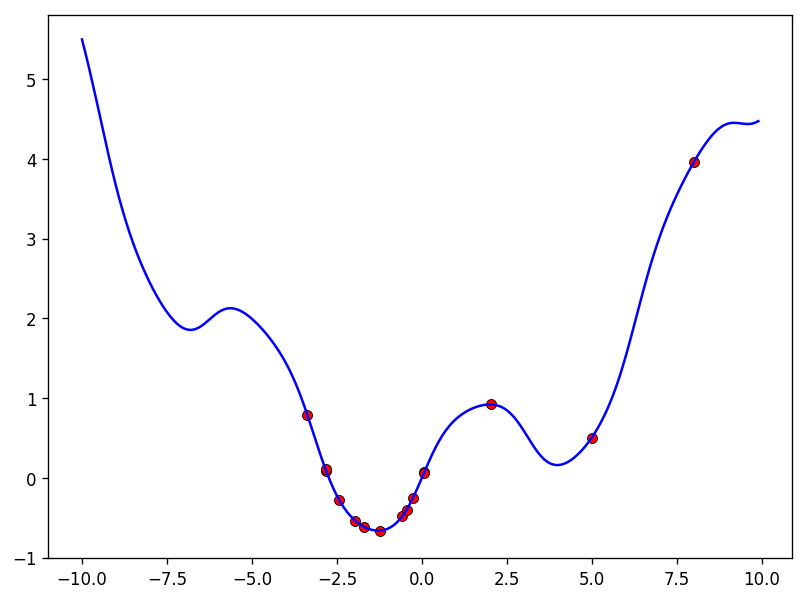

In [13]:
x0 = 8
lr = 3
iterations = 15

x_range = torch.arange(-10, 10, 0.1)
init_2dplot(x_range, function_2d, delta_=0.5)

x = torch.Tensor([x0]).requires_grad_()
optimizer = torch.optim.Adam([x], lr=lr)

for i in range(iterations):
    optimizer.zero_grad()
    f = function_2d(x)
    f.backward()
    add_point_2d(x, f)
    optimizer.step()

### 3D Plot - Optimization process

In [14]:
from live_plot import init_3dplot, add_point_3d

__Choose a function below and run the cell__

In [15]:
elev, azim = 40, 250
x0, y0 = 6, 0
x_range = torch.arange(-10, 10, 1).float()
y_range = torch.arange(-15, 10, 2).float()

def function_3d(x, y):
    return x ** 2 - y ** 2

In [16]:
elev, azim = 30, 130
x0, y0 = 10, -4
x_range = torch.arange(-10, 15, 1).float()
y_range = torch.arange(-15, 10, 2).float()

def function_3d(x, y):
    return x ** 3 - y ** 3

In [17]:
elev, azim = 80, 130
x0, y0 = 4, -5
x_range = torch.arange(-10, 10, .5).float()
y_range = torch.arange(-10, 10, 1).float()

def function_3d(x, y):
    return (x ** 2 + y ** 2).sqrt().sin()

In [18]:
elev, azim = 37, 120
x0, y0 = 6, -15
x_range = torch.arange(-10, 12, 1).float()
y_range = torch.arange(-25, 5, 1).float()

# lr 0.15 momentum 0.5
def function_3d(x, y):
    return (x ** 2 / 20 + x.sin().tanh()) * (y.abs()) ** 1.2 + 5 * x.abs() + (y + 7)**2 / 10

__Optimize the function__

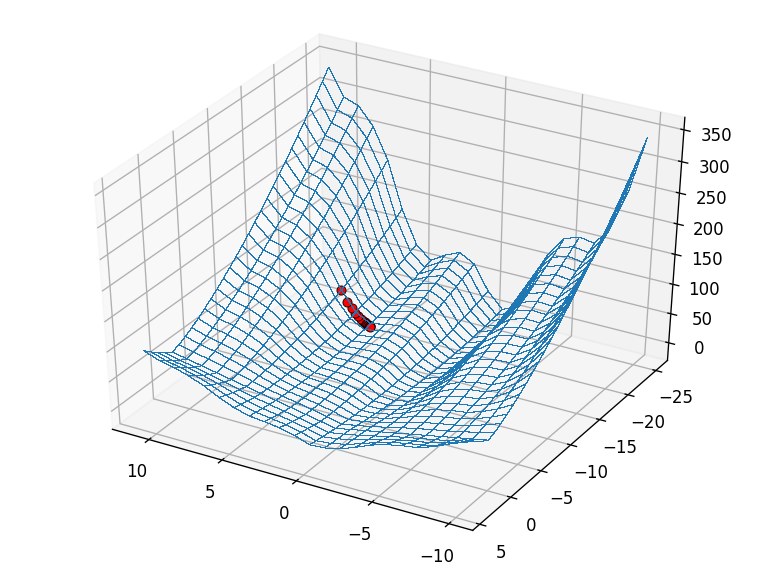

In [19]:
init_3dplot(x_range, y_range, function_3d, elev, azim, delta_=0.1)

#x0 = 
#y0 = 

lr = 0.01
iterations = 15

x = torch.Tensor([x0]).requires_grad_()
y = torch.Tensor([y0]).requires_grad_()
optimizer = torch.optim.SGD([x, y], lr=lr)

for i in range(iterations):
    optimizer.zero_grad()
    f = function_3d(x, y)
    f.backward()
    add_point_3d(x, y, f)
    optimizer.step()

___

## Don't forget to download the notebook, otherwise your changes may be lost

![Download the notebook](figures/notebook-download.png)